# Convex Polygons

The buildings data may be usefull in order to get the outlines of a city.
Consider, for example, this dataframe of Katsrin.
This is the region that was cut from the BNTL source at the previous page.
It may be loaded from the database as shown there;
here we will load it from the documentation's examples directory.

In [1]:
import geopandas
from hera import toolkitHome
projectName = "documentation"
FilesDirectory = "New-Files-Directory"
buildings  = toolkitHome.getToolkit(toolkitName=toolkitHome.GIS_BUILDINGS,
                                    projectName=projectName)

katsrinBuildings = geopandas.read_file("examples/Katsrin/BLDG.shp")
katsrinBuildings.plot()

KeyboardInterrupt: 

We can get a polygon the surrounds the city using the next function:

<AxesSubplot:>

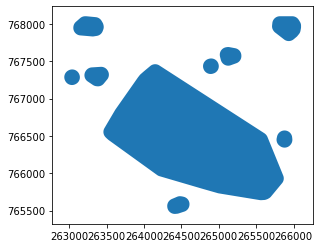

In [2]:
convexed = buildings.analysis.ConvexPolygons(katsrinBuildings)
convexed.plot()

As can be seen, additional polygons were created in addition to the main city.
They belong to smaller groups of buyildings.
The sentivity of the function to seperation between groups of buildings is controlled using the "buffer" parameter.
Notice the difference in seperation between the next examples:

<AxesSubplot:>

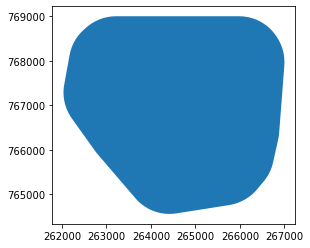

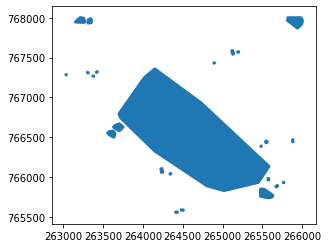

In [3]:
largeBuffer = buildings.analysis.ConvexPolygons(katsrinBuildings, buffer=1000)
smallBuffer = buildings.analysis.ConvexPolygons(katsrinBuildings, buffer=10)
largeBuffer.plot()
smallBuffer.plot()

The same method can be used for getting the polygons of several small settlements in desired area,
for instance, this thin area around the Arava Road between Lotan and Yotvata.

<AxesSubplot:>

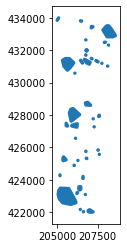

In [10]:
AravaBuildings = geopandas.read_file("examples/Arava/BLDG.shp")
settlementsPolygons = buildings.analysis.ConvexPolygons(AravaBuildings)
settlementsPolygons.plot()

As can be seen, many small polygons were made, due to small isolated buildings. 
However, the four largest polygons match the positions of the four settlements in the area.
We may drop the rest of the polygons and gain a dataframe with the settlements only.

,level_0,index,geometry,area
0,0,0,"POLYGON ((205843.000 422384.190, 205842.951 42...",1.141237e+06
1,1,0,"POLYGON ((208438.645 432727.209, 208086.241 43...",5.776226e+05
2,2,0,"POLYGON ((205639.200 430668.810, 205639.151 43...",5.602497e+05
3,3,0,"POLYGON ((205872.700 427524.190, 205872.651 42...",5.164626e+05


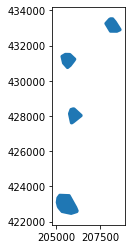

In [12]:
settlementsOnly = settlementsPolygons.sort_values("area",ascending=False).reset_index()[:4]
settlementsOnly.plot()
settlementsOnly